# The `Titanic` dataset

Go to the following `kaggle` webpage [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

If you don't have a `kaggle` account, create one.

Download the `train.csv` dataset.

Answer the following questions using the libraries `pandas`, `seaborn` and/or any other library that you like.
We expect you to produce **nice looking plots**, at least **readable** and perform the required computations
 as concisely as possible using the `pandas` API. This is the way we will evaluate this homework.

Before boarding on the homework, import (install them if needed)
the next modules.




In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pdpipe as pdp

import requests

import re
import os
from collections import namedtuple
from collections import abc
from statsmodels.graphics.mosaicplot import mosaic

sns.set_context("notebook", font_scale=1.2)

The first thing to do is to read the description of
the columns and understand what the dataset is about and what it contains.

## Question : inspecting a DataFrame

Open the dataframe with `pandas`, check the first lines of the dataset

### Answer

In [2]:
df_dtypes = {
    'PassengerId': np.int,
    'Survived': bool,
    'PClass': np.int,
    'Name': str,
    'Sex': 'category',
    'Age': np.float,
    'SibSp': np.int,
    'Parch': np.int,
    'Ticket': object,
    'Fare': np.float,
    'Cabin': object,
    'Embarked': 'category'
}

df = pd.read_csv("train.csv", sep=',', dtype=df_dtypes)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Method `info`  print a a concise summary of a `DataFrame`.
With optional parameter `memory_usage`, you can get an estimate
of the amount of memory used by the `DataFrame`. Beware that
the resulting estimate depends on the argument fed.



In [3]:
df.info(memory_usage=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(2), float64(2), int64(4), object(3)
memory usage: 65.6+ KB



## Question: Checking the types of columns

Check the types of the columns.

- How do you obtain the type of a column?
- How do you obtain the datatype (`dtype`) of elements of a column?

### Answer



In [4]:
type(df['Name'])

pandas.core.series.Series

In [5]:
type(df['Name'][0])

str

In [6]:
df.dtypes

PassengerId       int64
Survived           bool
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

## Question: selecting columns according to datatype

Project (in the SQL sense)  the DataFrame on columns with a specified datatype.
For example, project (as in the SQL `SELECT`)
the Titanic `DataFrame` on the  numerical columns.

Hint: method `select_dtypes`

### Answer


In [7]:
df.select_dtypes(include='number')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000



## Question: computing number of distinct values in each column

For each column with non-numerical datatype compute the number of unique values
in the column.

### Answer



In [8]:
non_num = df.select_dtypes(exclude='number').nunique()
non_num

Survived      2
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64


## Question: spotting categorical columns

What are the indices and column names of columns
with less than `10` distinct vakues ?

### Answer



In [9]:
d = (df.select_dtypes(exclude='number').nunique() < 10)
ind = d[d == True].index
[(k, e) for k, e in enumerate(df.columns) if e in ind]

[(1, 'Survived'), (4, 'Sex'), (11, 'Embarked')]


## Question: coercing column datatypes

- `Name` should be of type `string`
- `Sex` is a categorical variable with values `Female, Male, None`
- `Embarked` is a categorical variable with values `Cherbourg, Southampton, ..., None`
- `Ticket` should be a string
- `Cabin` should be a string
- `Survived` should be of type `bool`
- `Pclass` is a categorical variable (ordered)
- `Sibsp` could a categorical variable (ordered)
- `Parch` could a categorical variable (ordered)

Attempt to automatically infer better types fails.




### Answer



In [10]:
df.Pclass = pd.Categorical(df.Pclass, ordered=True)
df.SibSp = pd.Categorical(df.SibSp, ordered=True)
df.Parch = pd.Categorical(df.Parch, ordered=True)
# df.Sex = pd.Categorical(df.Sex, categories=['female', 'male', 'none'])
df.dtypes

PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


## Question: coercing column datatypes

All suspicious columns could be converted to `category`.
Some of the categories have to be ordered.


### Answer


Voir la 1.6.1



## Question: categorizing columns using functions

Define a function that takes as arguments a `Dataframe` and a list of
of column names and attempts to cast the corresponding columns to 'category'.

### Answer




In [11]:
def convertCategory(df, cols):
    df[cols] = df[cols].astype('category')
    return df


## Question: enforcing datatypes at loading time


Function `read_csv` from `Pandas` has many optional keyword arguments that
can be used to tweak the resulting `Dataframe` during (or just after load).

Improve your import of the data: for instance,
categorical columns (a column with a small number of modalities)
should have the `category` type.

### Answer


In [12]:
df_dtypes = {
    'PassengerId': np.int,
    'Survived': bool,
    'PClass': 'category',
    'Name': str,
    'Sex': 'category',
    'Age': np.float,
    'SibSp': 'category',
    'Parch': 'category',
    'Ticket': str,
    'Fare': np.float,
    'Cabin': str,
    'Embarked': 'category'
}

df = pd.read_csv("train.csv", sep=',', dtype=df_dtypes)

# to keep the order for numerical categories
df.Pclass = pd.Categorical(df.Pclass, ordered=True)
df.SibSp = pd.Categorical(df.SibSp, ordered=True)
df.Parch = pd.Categorical(df.Parch, ordered=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Question: Count the number of missing values in each column

Display the distribution of `Pclass`  and `Cabin == NaN` in
the subpopulation defined by the missingness of `Age`.

Hint: you may use function `mosaic` from package `statsmodels`. See 
`from statsmodels.graphics.mosaicplot import mosaic`

### Answer

In [13]:
# filter to get the rows without age value
data_age_na = df[df.Age.isna()]

# to check the next results
data_cabin_na = data_age_na[data_age_na.Cabin.isna()]
data_cabin_na.shape

(158, 12)

In [14]:
# count NaN according to their class
data_crosstab = pd.crosstab(data_age_na['Pclass'], data_age_na['Cabin'].isna(), dropna=False)
data_crosstab.unstack()

Cabin  Pclass
False  1          16
       2           1
       3           2
True   1          14
       2          10
       3         134
dtype: int64

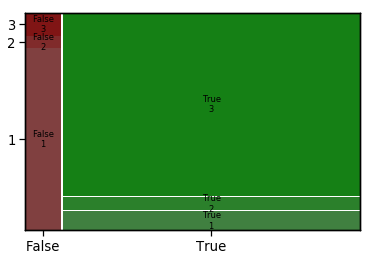

In [15]:
mosaic(data_crosstab.unstack())
plt.show()

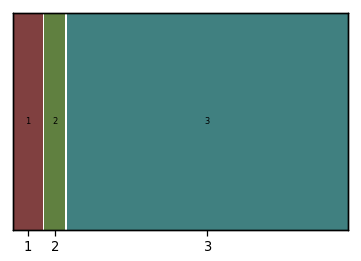

In [16]:
# take values where Cabin == NaN is True
mosaic(data_crosstab.unstack()[1])
plt.show()

So, there are much more missing values about cabins from passengers in class 3 than from the others.



## Question: number of missing values per row

It is also possible to determine the number of NA values per row.
List the rows with at least two missing values. Can you complete
some dots?

### Answer

In [17]:
df.isnull().sum(axis=1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [18]:
df.loc[df.isnull().sum(axis=1) > 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,True,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,True,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,False,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,True,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,False,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,False,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,False,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,False,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S




## Question: describe, showing quintiles

For each numerical column, show the *quintiles* (from $20\%$ up to $80\%$).

### Answer



In [19]:
df.select_dtypes(include='number').quantile(q=[.2, .4, .6, .8])

,PassengerId,Age,Fare
0.2,179.0,19.0,7.8542
0.4,357.0,25.0,10.5000
0.6,535.0,31.8,21.6792
0.8,713.0,41.0,39.6875




## Question: binning the `Age` column

Create a new categorical column named `Status`.

The value should be should depend on the `Age`
column with bins  `[0,17], (17, 40], (40, 60], (60, 100]`
(`np.nan` for passengers whose age is unknown).

### Answer




In [20]:
bins = pd.IntervalIndex.from_tuples([(0, 17), (17, 40), (40, 60), (60 ,100)])
df['Status'] = pd.cut(df['Age'], bins)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17.0, 40.0]"
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(17.0, 40.0]"
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17.0, 40.0]"
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(17.0, 40.0]"
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(17.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(17.0, 40.0]"
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(17.0, 40.0]"
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(17.0, 40.0]"



## Question: 

Draw a `countplot` for each categorical column, arrange the `countplot`s in a grid 
with two rows and three columns.

### Answer

In [21]:
cat_col = df.select_dtypes(include='category')
cat_col.head()

,Pclass,Sex,SibSp,Parch,Embarked,Status
0,3,male,1,0,S,"(17, 40]"
1,1,female,1,0,C,"(17, 40]"
2,3,female,0,0,S,"(17, 40]"
3,1,female,1,0,S,"(17, 40]"
4,3,male,0,0,S,"(17, 40]"


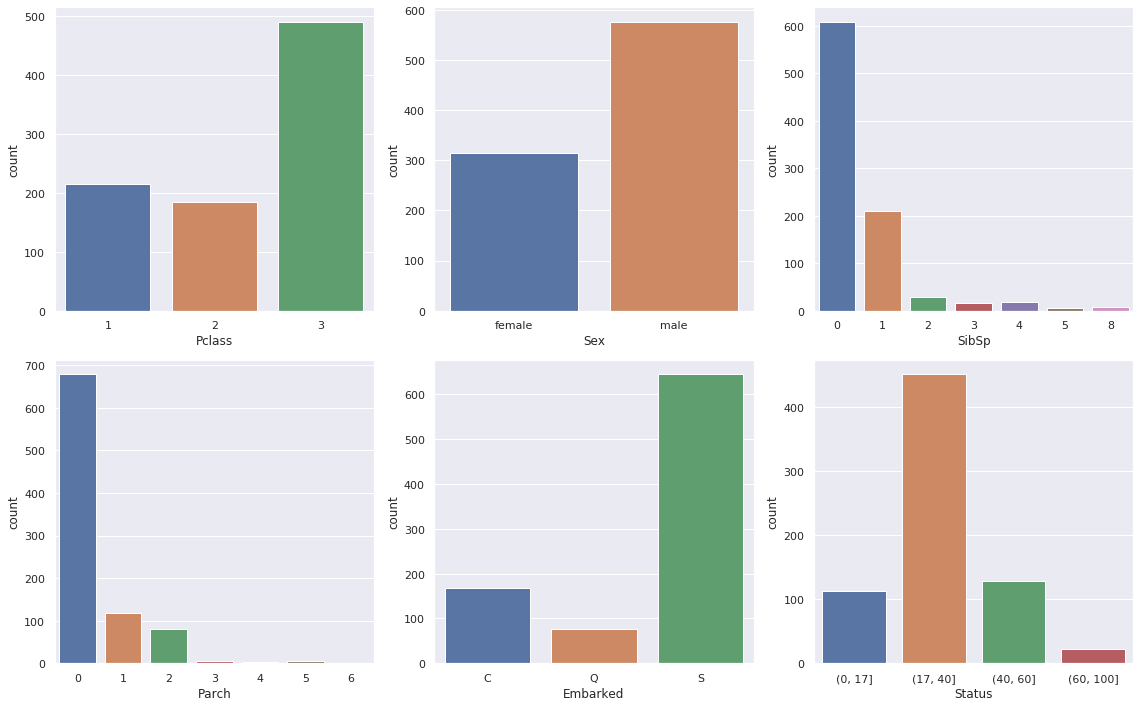

In [22]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i, e in enumerate(cat_col.columns):
    sns.countplot(x=e, data=cat_col, ax=fig.axes[i])
plt.tight_layout()


## Question: plotting the distribution of numerical columns

For each column for which it makes sense, display its distribution using `seaborn`:
choose the most relevant type of plot for each column and display it.

**Remark.** Note that the `Age` column contains missing values:
show the number of missing / non-missing values in this column, and show the distribution of non-missing ages in a different plot.
Also, note that there is a `notna()` method for dataframes...

### Answer


In [23]:
dfn=df.select_dtypes(include='number')
# the distribution is not needed for PassengerId (there are as many ids as there are rows)
dfn=dfn.drop(['PassengerId'],axis=1)
dfn.nunique()

Age      88
Fare    248
dtype: int64

In [24]:
dfn.count()

Age     714
Fare    891
dtype: int64

Number of missing age: 177 | Non-missing : 714


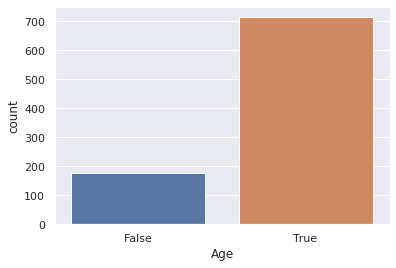

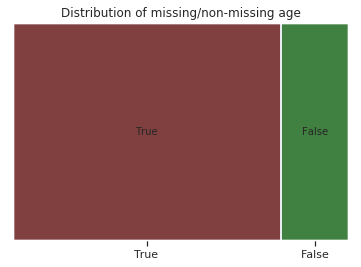

In [25]:
agen= dfn.notna()
agemiss= dfn['Age'].isnull().sum(axis=0)
print("Number of missing age: "+str(agemiss)+" | Non-missing : "+ str(dfn.shape[0] - agemiss))
sns.countplot(x=agen['Age'])
mosaic(agen,['Age'],title='Distribution of missing/non-missing age')
plt.show()

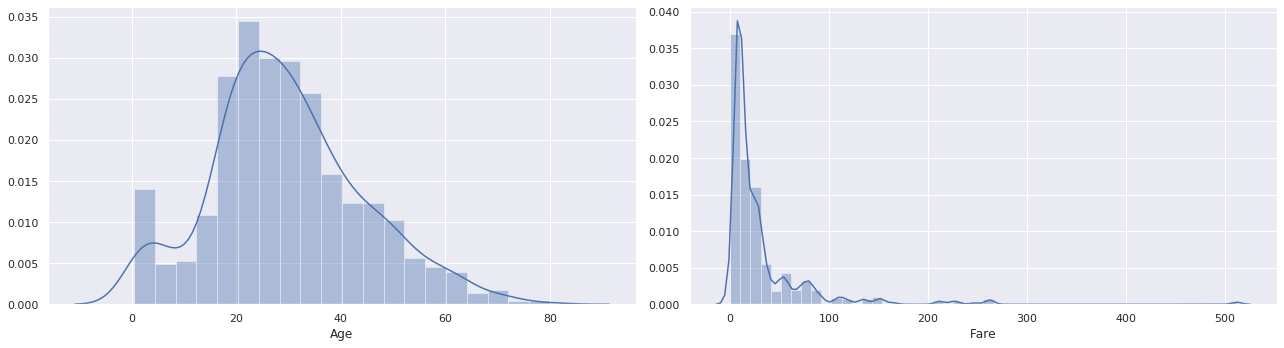

In [26]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
tmp_nbr = sns.distplot(dfn['Age'].dropna(), ax=fig.axes[0])
sns.distplot(dfn['Fare'].dropna(), ax=fig.axes[1])
plt.tight_layout()



## Question: plot numerical columuns according to categorical columns

Do the same as in Question 4,
but **differentiate** the plots
for passengers the passengers that survived and the ones who did not.
You can use the `hue` option,
you can use a `FacetGrid`.
Look at the `seaborn` documentation and choose the best option.

### Answer

#### Facets



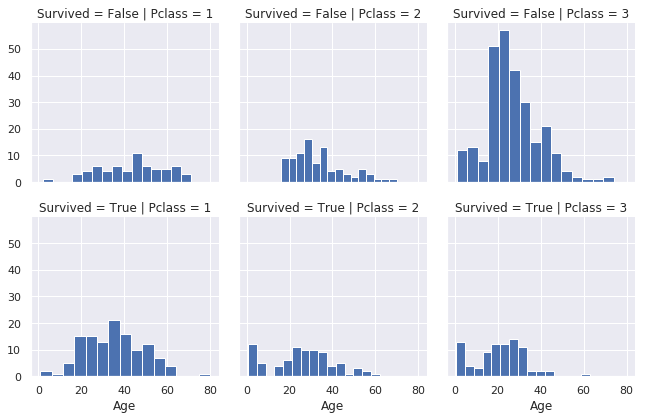

In [27]:
g = sns.FacetGrid(df, row='Survived', col='Pclass')
g.map(plt.hist, 'Age', bins=15)
g.add_legend();

Without looking in details, it is highlighted that most of the passengers died; the ones who died were most of them between 20-30 years old and in class 3.

#### Boxplot

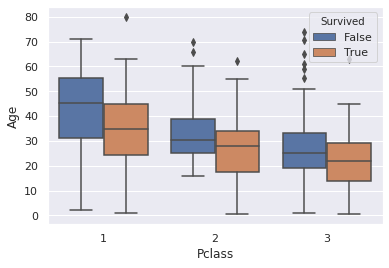

In [28]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.show()

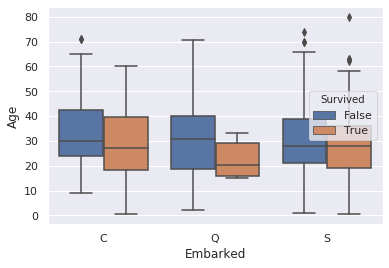

In [29]:
sns.boxplot(x='Embarked', y='Age', hue='Survived', data=df)
plt.show()

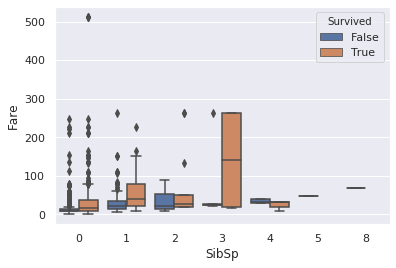

In [30]:
sns.boxplot(x='SibSp', y='Fare', hue='Survived', data=df)
plt.show()

It's interesting to note that those who paid quite much compared to the others, and having three siblings/spouses on board were those who survived mostly.

#### Catplot

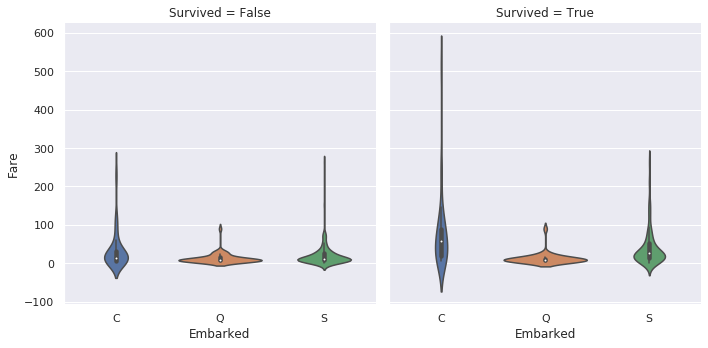

In [31]:
sns.catplot(x='Embarked', y='Fare', col='Survived', kind='violin', data=df)
plt.show()

About those who embarked through Q and S, there isn't big differences in the amount they paid, are they survivors or not.  
On the other hand, we can see that those who paid the most and embarked through C were survivors.

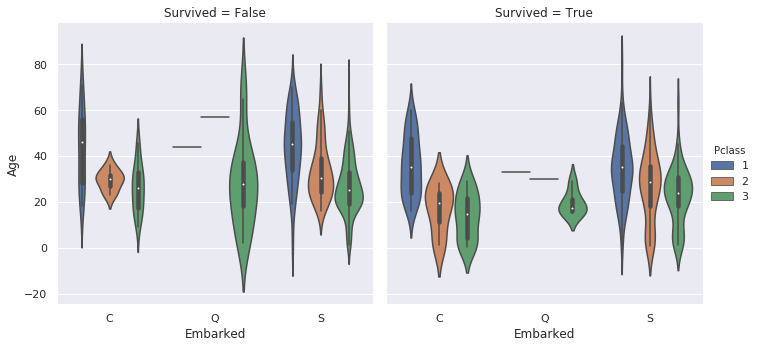

In [32]:
sns.catplot(x='Embarked', y='Age', hue='Pclass', col='Survived', kind='violin', data=df)
plt.show()

Those who embarked through Q where almost exclusively of class 3. There were passengers of all ages, but their survivors were most of them less than 20 years old.  
About those who embarked through S, there is a little difference in age: the younger survived more often.  
Finally, about those who embarked through C, most of them survived.




## Question: categorical plots, barplots

The `Titanic`  dataset may be compared with datasets generated by
*surveys* (*questionnaires*). In such datasets, each row correspond
to an individual. An individual is described by *demographic* variables
and *attitudinal/response* variables. Here, `Age, Sex, Pclass, Embarked, ...`
are considered as demographic variables while `Survived` is
regarded as an attitudinal/response variable. It is desirable to plot the response
variable as a function of (some of) the demographic variables.
All variables are categorical.

### Answer



In [33]:
df.dtypes

PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            object
Embarked       category
Status         category
dtype: object

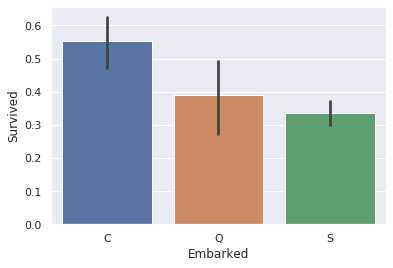

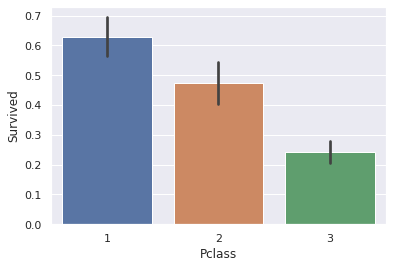

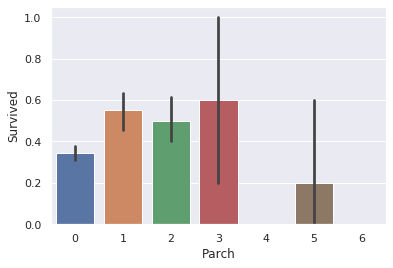

In [34]:
def afficheSurvived(df, variable):
    sns.barplot(x=variable, y='Survived', data=df)
    plt.show()
    
afficheSurvived(df, 'Embarked')
afficheSurvived(df, 'Pclass')
afficheSurvived(df, 'Parch')


Barplots do not give us hints about the size of the different sub-populations.


## Question: categorical plots, mosaicplots



You have drawn a `boxplot` of `Age` with respect to passenger class (`Pclass`).
It would be nice to complement the plot with an indication of the number of missing values.
It would also make sense to indicate the number of individuals in each subsample.

Mosaicplot as delivered by module `statsmodels` is a very
powerful tool to visualize *contingency tables*.

A *two-way contingency table* and the associated `mosaicplot` reveal that
the passengers who boarded in the three harbors (Southampton, Cherbourg, Q)
did not buy the same kind of tickets. Half of the passengers embarked at Cherbourg
travelled first class while at most one fourth of the passengers embarked
at Southampton did.

### Answer



In [35]:
df.dtypes

PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            object
Embarked       category
Status         category
dtype: object

In [36]:
df.loc[(df.Survived == 0) & (df.Pclass.astype(np.int) == 3) & (df.Age.isna())].shape

(102, 13)

In [37]:
df.size

11583

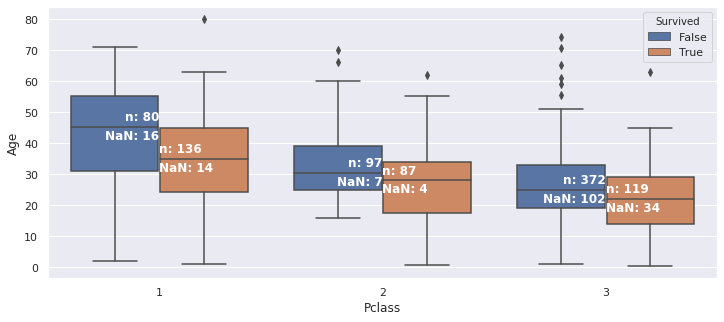

In [38]:
fig, axes = plt.subplots(figsize=(12, 5))
ax = sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)

nobsST = df.loc[df['Survived'] == 1].groupby('Pclass').size().values
nobsSF = df.loc[df['Survived'] == 0].groupby('Pclass').size().values

mediansST = df.loc[df['Survived'] == 1].groupby('Pclass')['Age'].median().values
mediansSF = df.loc[df['Survived'] == 0].groupby('Pclass')['Age'].median().values

nobsST = [str(x) for x in nobsST.tolist()]
nobsST = ["n: " + i for i in nobsST]

nobsSF = [str(x) for x in nobsSF.tolist()]
nobsSF = ["n: " + i for i in nobsSF]

missST = df.loc[(df['Survived'] == 1) & (df['Age'].isnull())].groupby('Pclass').size().values
missSF = df.loc[(df['Survived'] == 0) & (df['Age'].isnull())].groupby('Pclass').size().values
missST = [str(x) for x in missST.tolist()]
missST = ["NaN: " + i for i in missST]
missSF = [str(x) for x in missSF.tolist()]
missSF = ["NaN: " + i for i in missSF]

pos = range(len(nobsST))

for tick, label in zip(pos, axes.get_xticklabels()):
    plt.text(pos[tick], mediansSF[tick] + 2, nobsSF[tick], 
             horizontalalignment='right', size='medium', color='w', weight='semibold')
    plt.text(pos[tick], mediansSF[tick] - 4, missSF[tick], 
             horizontalalignment='right', size='medium', color='w', weight='semibold')
    plt.text(pos[tick], mediansST[tick] + 2, nobsST[tick], 
             horizontalalignment='left', size='medium', color='w', weight='semibold')
    plt.text(pos[tick], mediansST[tick] - 4, missST[tick], 
             horizontalalignment='left', size='medium', color='w', weight='semibold')
        
plt.show()

The passengers of class 1 were quite old, the young ones were travelling in class 3.  
Most of the passengers were in class 3, most of the passengers with an unknown age too.  
The age's range for class 3 is much more narrow than for class 1.  
Most of the survivers were in class 1 with a median age lower than the median age of those who died in class 1.

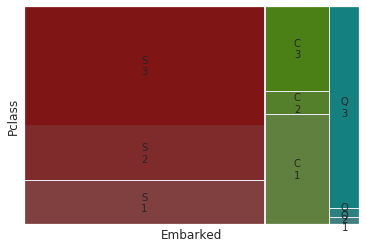

In [39]:
mosaic(df, ['Embarked', 'Pclass'], axes_label=False)
plt.xlabel('Embarked')
plt.ylabel('Pclass')
plt.show()

Most of the people embarked through S, and they were most of them in class 3.  
Most of those who were in class 1 embarked through C.  
Those who embarked throught Q were almost exclusively of class 3.


## Question: three-way mosaicplots

A three-way contingency illustrate the association between `Sex`, `Pclass`
and `Survived`.

### Answer



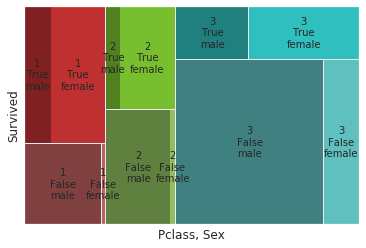

In [40]:
mosaic(df, ['Pclass', 'Survived', 'Sex'], axes_label=False)
plt.xlabel('Pclass, Sex')
plt.ylabel('Survived')
plt.show()

In decreasing order, the passengers that died the most were from the classes 3,2 and 1.  
Most of the survivors were women, so men died the most, regardless of the class.


## Question: roommates

For each passenger, compute the number of passengers in the same cabin (including himself).
Add a column called `Roommates` that contain this information.
When the cabin information is missing, then the `Roommates` is missing as well.
You will need to use `groupby` and `join` operations.



**Warning.** You should not `reset_index` after the `groupby` operation if you `join` with the resulting dataframe.


We may proceed by projecting on columns
`PassengerId`,  and `Cabin` while filtering (selecting) the rows
where `Cabin` is available. This is the `df_cabin` dataframe below.





- Plot `Roommates` according to `Pclass`
- Plot `Roommates` according to `Embarkment`
- Plot `Roommates` according to `Sex`

### Answer

In [41]:
effectCabin = df.groupby('Cabin')['PassengerId'].count().to_frame()
effectCabin

,PassengerId
Cabin,
A10,1
A14,1
A16,1
A19,1
A20,1
...,...
F33,3
F38,1
F4,2


In [42]:
effectCabin = effectCabin.rename(columns={'PassengerId': 'Roommates'})
effectCabin

,Roommates
Cabin,
A10,1
A14,1
A16,1
A19,1
A20,1
...,...
F33,3
F38,1
F4,2


In [43]:
df_cabin = df.join(effectCabin, how='left', on=['Cabin'])
df_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17.0, 40.0]",NaN
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(17.0, 40.0]",1.0
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17.0, 40.0]",NaN
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(17.0, 40.0]",2.0
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(17.0, 40.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(17.0, 40.0]",NaN
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(17.0, 40.0]",1.0
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(17.0, 40.0]",1.0


In [44]:
df_cabin.loc[df_cabin['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
258,259,True,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,"(17, 40]",NaN
679,680,True,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,"(17, 40]",2.0
737,738,True,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,"(17, 40]",1.0




## Question: plotting  `RoomMates` column.


### Answer



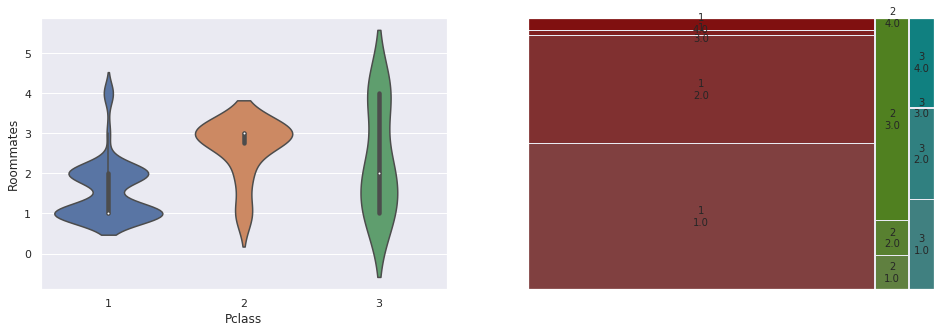

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.violinplot(x='Pclass', y='Roommates', data=df_cabin, ax=fig.axes[0])
mosaic(df_cabin, ['Pclass', 'Roommates'], axes_label=False, ax=fig.axes[1])
plt.show()

Those graphs show that most of the passengers were in class 1, and they were usually travelling alone or in couple.  
The passengers of class 2 and 3 were a minority on the boat; the passengers of class 2 were those that travelled in groups of three, while the passengers of class 3 were rather equally travelling alone or in groups of 2-3.

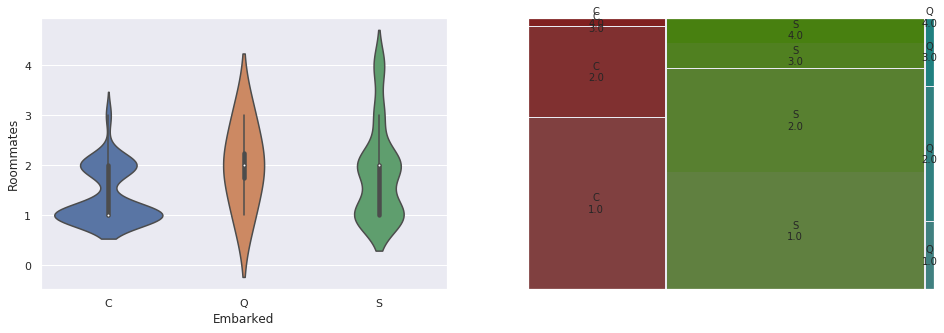

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.violinplot(x='Embarked', y='Roommates', data=df_cabin, ax=fig.axes[0])
mosaic(df_cabin, ['Embarked', 'Roommates'], axes_label=False, ax=fig.axes[1])
plt.show()

Here, we see that most of the lonely passengers embarked through C, that there were not much people embarking through Q, but the propotions of couples is rather equal for each gate. Also, having 3-4 roommates wasn't common.

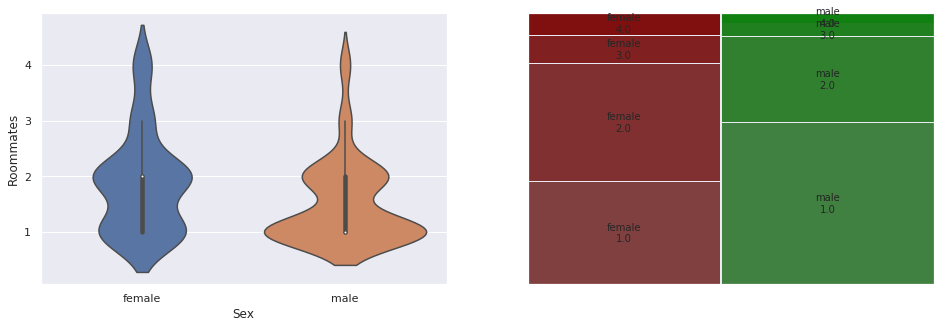

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.violinplot(x='Sex', y='Roommates', data=df_cabin, ax=fig.axes[0])
mosaic(df_cabin, ['Sex', 'Roommates'], axes_label=False, ax=fig.axes[1])
plt.show()

From those graphs, we can see that most of the lonely passengers were males, but a large part of the passengers were still travelling in couples.



## Question: surviving together

Is there a cabin where some passengers survived while others did not?


### Answer



In [48]:
df_tmp = df_cabin.loc[df_cabin['Roommates'] > 1]
df_tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(17.0, 40.0]",2.0
10,11,True,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.0, 17.0]",4.0
27,28,False,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,"(17.0, 40.0]",4.0
52,53,True,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,"(40.0, 60.0]",2.0
55,56,True,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,830,True,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,"(60.0, 100.0]",2.0
849,850,True,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,NaN,2.0
862,863,True,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,"(40.0, 60.0]",2.0
871,872,True,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(40.0, 60.0]",2.0


In [49]:
effectCabin = df_tmp.groupby('Cabin')['PassengerId'].count().to_frame()
effectSurv = df_tmp.groupby('Cabin')['Survived'].sum().to_frame()

In [50]:
sousVals = effectCabin['PassengerId'] - effectSurv['Survived']
sousVals = (sousVals > 0) & (sousVals != effectCabin['PassengerId'])
sousVals = sousVals.to_frame()
listCab = sousVals[0].index.values
print(listCab[sousVals[0]])

['B22' 'B51 B53 B55' 'B58 B60' 'C123' 'C2' 'C22 C26' 'C23 C25 C27' 'C65'
 'C68' 'C78' 'C83' 'D' 'E44' 'E67' 'F2' 'G6']




## Question: Missing `Cabin`  value and `Age`


The `Cabin` column is `NaN` for many rows, how are
those missing data distributed acrross the classes?

Plot the age distribution with
respect to the availability of the `Cabin` column (`Cabin.isna()`).

### Answer


In [51]:
df_tmp = df_cabin.loc[df_cabin['Cabin'].isna()]
df_tmp = df_tmp.loc[df_tmp['Age'].notna()]
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17, 40]",NaN
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17, 40]",NaN
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(17, 40]",NaN
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0, 17]",NaN
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(17, 40]",NaN


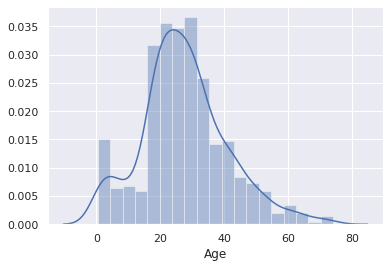

In [52]:
sns.distplot(df_tmp['Age'])
plt.show()



## Question: Milking the `Name` column

Column `Name` gathers different kind of information pertaining
to a passenger: name, civility,
and given name(s). For some female passengers, the apparent given names
are actually the husband's name and the maidens name is indicated between
parentheses.

The information contained in the `Name` column Has to be extracted in a proper way:
The string should be into three parts: the first one containing the name,
the second one containing the civility  and, the last one
possibly containing given names or given names plus maiden names. Passing is
facilitated by the next observation: the name is followed by a comma, the
civility is followed by a period. You may use regular expressions
as providede by  module `re`  or module `regex`.


- Split the information contained in `Name` into three columns `Name`, `Given_names`, and `Civility`.
- Go one step further. Extract the *maiden name* and actual *given names* when information available.

At the end of the day, column `Name` should contain the *maiden name* for married female passengers
Column `Given_Names` should contain the real given names of the passenger, not the ones of the spouse.

To learn more about Regular Expressions see the documentation
of the [`re` module](https://docs.python.org/3/library/re.html#module-re)
and the tutorial [Howto](https://docs.python.org/3/howto/regex.html#regex-howto)

Understand the difference between a `string` and a `raw string`.



In [53]:
print(r"\n is not a newline", "\nis a newline\n", "\\\\n is not a newline\n")


\n is not a newline 
is a newline
 \\n is not a newline



In [54]:
df_cabin.loc[df_cabin['Sex'] == 'female'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(17, 40]",1.0
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17, 40]",NaN
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(17, 40]",2.0
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(17, 40]",NaN
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0, 17]",NaN



### Answer



In [55]:
def parse_name(s):
    """Parse name field in Titanic data frame.

    ACHTUNG: there are some outliers with given names containing parenthsized items. 
    Some people travelled under pseudonyms 
    (see [Henry Samuel Morley](https://www.encyclopedia-titanica.org/titanic-victim/henry-samuel-morley.html)).
    """
    name = s
    civility, Spouse_name, Maiden_name, given_names = None, None, None, None
    
    malenames = re.search(r"(\w+)\,\ ((the\ )?(\w+\.?)(\ of)?)\ \(?(\w*\ *\w*)\)?", s)
    given_names = malenames.group(6)
    civility = malenames.group(4)
    
    femnames = re.search(r"\(((\w+\ )+)(\"\w+\"\ )*((\w+\ )*)(\w+\-*\w*)\)", s)
    
    name = malenames.group(1)
    
    sologivname = re.search(r"\((\w+\-*\w*)\)", s)
    if sologivname:
        given_names = sologivname.group(1)
    
    if femnames:
        if femnames.group(4):
            given_names = femnames.group(1) + femnames.group(4)
        else:
            given_names = femnames.group(1)
        name = femnames.group(6)
        # Maiden_name = parnames.group(3)
        # Spouse_name = orignames.group(1)
        
    
    return {'Name': name.rstrip(),
            'Given_names': given_names.rstrip(),
            'Civility': civility.rstrip()}
            # 'Spouse_name': Spouse_name,
            # 'Maiden_name': Maiden_name}


In [56]:
print(df_cabin.Name[888])
parse_name(df_cabin.Name[888])

Johnston, Miss. Catherine Helen "Carrie"


{'Name': 'Johnston', 'Given_names': 'Catherine Helen', 'Civility': 'Miss.'}

In [57]:
print(df_cabin.Name[759])
parse_name(df_cabin.Name[759])

Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)


{'Name': 'Dyer-Edwards',
 'Given_names': 'Lucy Noel Martha',
 'Civility': 'Countess.'}

In [58]:
print(df_cabin.Name[190])
parse_name(df_cabin.Name[190])

Pinsky, Mrs. (Rosa)


{'Name': 'Pinsky', 'Given_names': 'Rosa', 'Civility': 'Mrs.'}

In [59]:
print(df_cabin.Name[161])
parse_name(df_cabin.Name[161])

Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)


{'Name': 'Milne', 'Given_names': 'Elizabeth Inglis', 'Civility': 'Mrs.'}

In [60]:
print(df_cabin.Name[101])
parse_name(df_cabin.Name[101])

Petroff, Mr. Pastcho ("Pentcho")


{'Name': 'Petroff', 'Given_names': 'Pastcho', 'Civility': 'Mr.'}

In [61]:
print(df_cabin.Name[140])
parse_name(df_cabin.Name[140])

Boulos, Mrs. Joseph (Sultana)


{'Name': 'Boulos', 'Given_names': 'Sultana', 'Civility': 'Mrs.'}

In [62]:
df_parse_name = df_cabin.copy()

In [63]:
df_parse_name[['Name', 'Given_names', 'Civility']] = pd.DataFrame([parse_name(x) for x in df_parse_name['Name']])
df_parse_name.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates,Given_names,Civility
0,1,False,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17, 40]",NaN,Owen Harris,Mr.
1,2,True,1,Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,"(17, 40]",1.0,Florence Briggs,Mrs.
2,3,True,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17, 40]",NaN,Laina,Miss.
3,4,True,1,Peel,female,35.0,1,0,113803,53.1000,C123,S,"(17, 40]",2.0,Lily May,Mrs.
4,5,False,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S,"(17, 40]",NaN,William Henry,Mr.


In [64]:
cols = list(df_parse_name.columns)
df_parse_name = df_parse_name.reindex(columns=cols[:4]+cols[14:]+cols[4:14])
df_parse_name.head()

,PassengerId,Survived,Pclass,Name,Given_names,Civility,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
0,1,False,3,Braund,Owen Harris,Mr.,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17, 40]",NaN
1,2,True,1,Thayer,Florence Briggs,Mrs.,female,38.0,1,0,PC 17599,71.2833,C85,C,"(17, 40]",1.0
2,3,True,3,Heikkinen,Laina,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17, 40]",NaN
3,4,True,1,Peel,Lily May,Mrs.,female,35.0,1,0,113803,53.1000,C123,S,"(17, 40]",2.0
4,5,False,3,Allen,William Henry,Mr.,male,35.0,0,0,373450,8.0500,NaN,S,"(17, 40]",NaN



## Question: about `map` objects

What is a `map object`? Is it a sequence (list, tuple, etc)? Is it
an `Iterable`? Something else? You may use function `isinstance` and
submodule `collections.abc` to settle these questions?

### Answer



A `map object` is the result from the usage of the `map` function: once a given function is applied to the elements of an `Iterable`, it is was we get; it is neither a list, nor a tuple, it is an `Iterator` that we can convert to a list, a set or something else, calling the according function to do so (`list()`, ...).

In [65]:
l= np.arange(4)
r= map(lambda x: x+x, l)
isinstance(r, abc.Iterator)

True


## Question: aristocrats on board

Some passengers were of noble extraction, or officers in some Army.
Point them.

### Answer



In [66]:
df_parse_name.Civility.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [67]:
df_parse_name.loc[~df_parse_name['Civility'].\
                  isin(['Mr.', 'Miss.', 'Mrs.', 'Rev.', 'Dr.', 'Ms.', 'Mme.', 'Mlle.'])]

,PassengerId,Survived,Pclass,Name,Given_names,Civility,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
7,8,False,3,Palsson,Gosta Leonard,Master.,male,2.00,3,1,349909,21.0750,NaN,S,"(0.0, 17.0]",NaN
16,17,False,3,Rice,Eugene,Master.,male,2.00,4,1,382652,29.1250,NaN,Q,"(0.0, 17.0]",NaN
30,31,False,1,Uruchurtu,Manuel E,Don.,male,40.00,0,0,PC 17601,27.7208,NaN,C,"(17.0, 40.0]",NaN
50,51,False,3,Panula,Juha Niilo,Master.,male,7.00,4,1,3101295,39.6875,NaN,S,"(0.0, 17.0]",NaN
59,60,False,3,Goodwin,William Frederick,Master.,male,11.00,5,2,CA 2144,46.9000,NaN,S,"(0.0, 17.0]",NaN
63,64,False,3,Skoog,Harald,Master.,male,4.00,3,2,347088,27.9000,NaN,S,"(0.0, 17.0]",NaN
65,66,True,3,Moubarek,Gerios,Master.,male,NaN,1,1,2661,15.2458,NaN,C,NaN,NaN
78,79,True,2,Caldwell,Alden Gates,Master.,male,0.83,0,2,248738,29.0000,NaN,S,"(0.0, 17.0]",NaN
125,126,True,3,Yarred,Elias,Master.,male,12.00,1,0,2651,11.2417,NaN,C,"(0.0, 17.0]",NaN
159,160,False,3,Sage,Thomas Henry,Master.,male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN



## Question: How many people are given Civility 'Mrs', 'Miss', 'Mr', 'Master'?


### Answer



In [68]:
cbMrs = df_parse_name.loc[df_parse_name['Civility'].isin(['Mrs.'])].shape[0]
cbMiss = df_parse_name.loc[df_parse_name['Civility'].isin(['Miss.'])].shape[0]
cbMr = df_parse_name.loc[df_parse_name['Civility'].isin(['Mr.'])].shape[0]
cbMaster = df_parse_name.loc[df_parse_name['Civility'].isin(['Master.'])].shape[0]
print(cbMrs, ' ', cbMiss, ' ', cbMr, ' ', cbMaster)
print(cbMrs + cbMiss + cbMr + cbMaster)

125   182   517   40
864



ACHTUNG: there are some outliers with given names containing parenthsized items. Some people travelled under pseudonyms (see [Henry Samuel Morley](https://www.encyclopedia-titanica.org/titanic-victim/henry-samuel-morley.html)).





## Question:  For each embarkment and sex, visualize the survival ratio.


### Answer



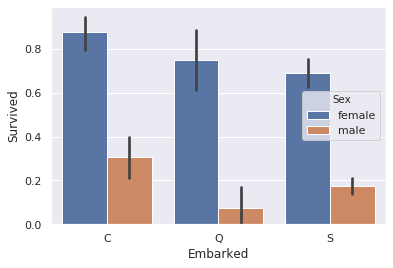

In [69]:
sns.barplot(x='Embarked', y='Survived',hue='Sex', data=df_cabin)
plt.show() 


## Question: for each `Pclass` and `Sex`, visualize the survival ratio,

### Answer



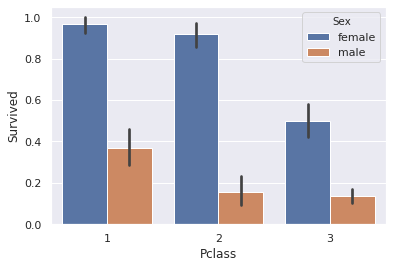

In [70]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=df_cabin)
plt.show() 



## Question: compute pairwise correlations between numerical columns.


### Answer



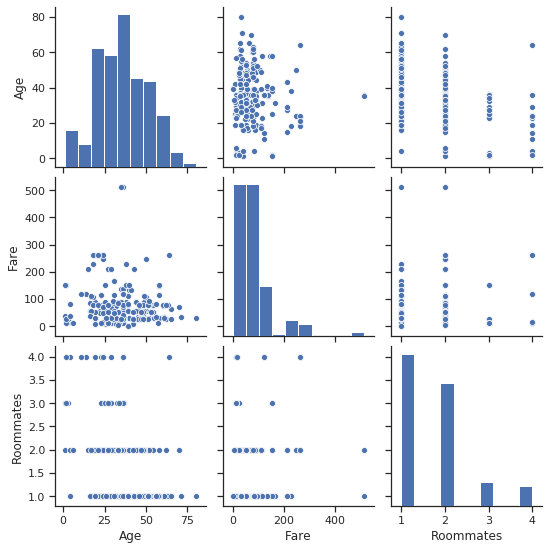

In [71]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_parse_name.drop('PassengerId', axis=1).select_dtypes(include='number').dropna())
plt.show()



## Pandas and SQL

A systematic comparison between Pandas and SQL querying can be found
at
[https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)


## Pandas pipeliness

Loading and transforming datasets is a cumbersome task. It is very likely that
the sequence of transformations you have performed on the `train.csv`  dataset will
be carried out on other datasets (just think about `test.csv`). For the sake of
reproducibility, it is convenient to build a *transformation pipeline*.
The `pipe` method for `DataFrame` class provides us with a means to do that.

Pipelining DataFrame methods is easy, it is enough to write:



In [72]:
# df.meth1(arg11, arg12)\
#   .meth2(arg21)\
#   .meth3(arg31, arg32, arg33)\
#   ...



### `pipe` method for class `DataFrame`


The `pipe` method allows us to chain transformations implemented by functions.
Pipelining ordinary functions can be done using the `pipe` method of
class `DataFrame`.



In [73]:
def addStatus(df):                                                 
    """
    Add the Status column classifying the passengers using the Age column
    """
    bins = pd.IntervalIndex.from_tuples([(0, 17), (17, 40), (40, 60), (60 ,100)])
    df['Status'] = pd.cut(df['Age'], bins)
    return df
    
def addRoommates(df):
    """
    Add the Roommates column indicating the number of travellers in the cabin for each passenger
    """
    effectCabin = df.groupby('Cabin')['PassengerId'].count().to_frame()
    effectCabin = effectCabin.rename(columns={'PassengerId': 'Roommates'})
    return df.join(effectCabin, how='left', on=['Cabin'])

def addCGN(df):
    """ 
    Add the Civility and Given_names columns, modifies the Name column from 
    the initial Name column
    """
    df[['Name','Given_names','Civility']] = pd.DataFrame([parse_name(x) for x in df['Name']])
    cols = list(df.columns)
    return df.reindex(columns=cols[:4]+cols[14:]+cols[5:14])

In [74]:
d2 = pd.read_csv('train.csv', dtype=df_dtypes)
(d2.pipe(addStatus)
 .pipe(addRoommates)
 .pipe(addCGN)
)

,PassengerId,Survived,Pclass,Name,Given_names,Civility,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
0,1,False,3,Braund,Owen Harris,Mr.,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17.0, 40.0]",NaN
1,2,True,1,Thayer,Florence Briggs,Mrs.,38.0,1,0,PC 17599,71.2833,C85,C,"(17.0, 40.0]",1.0
2,3,True,3,Heikkinen,Laina,Miss.,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17.0, 40.0]",NaN
3,4,True,1,Peel,Lily May,Mrs.,35.0,1,0,113803,53.1000,C123,S,"(17.0, 40.0]",2.0
4,5,False,3,Allen,William Henry,Mr.,35.0,0,0,373450,8.0500,NaN,S,"(17.0, 40.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,Montvila,Juozas,Rev.,27.0,0,0,211536,13.0000,NaN,S,"(17.0, 40.0]",NaN
887,888,True,1,Graham,Margaret Edith,Miss.,19.0,0,0,112053,30.0000,B42,S,"(17.0, 40.0]",1.0
888,889,False,3,Johnston,Catherine Helen,Miss.,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,True,1,Behr,Karl Howell,Mr.,26.0,0,0,111369,30.0000,C148,C,"(17.0, 40.0]",1.0




### Module `pdpipe`

Module [`pdpipe`](https://pdpipe.github.io/pdpipe/) is more ambitious.

A *transformation pipeline* defines a sequence of operations that should be applied
to a dataframe. In the `pdpipe` framework, it is an instance of class `pdpipe.PdPipeLine`





## Question: use `pdpipe`

Build a pipeline of transformatioms
using the [pdpipe](https://pdpipe.github.io/pdpipe/doc/pdpipe/) module.

### Answer



Done without docker image!

In [75]:
d2 = pd.read_csv('train.csv', dtype=df_dtypes)
d2.Pclass = pd.Categorical(df.Pclass, ordered=True)
d2.SibSp = pd.Categorical(df.SibSp, ordered=True)
d2.Parch = pd.Categorical(df.Parch, ordered=True)

bins = pd.IntervalIndex.from_tuples([(0, 17), (17, 40), (40, 60), (60 ,100)])

funStatus = lambda x: pd.cut(d2['Age'], bins)
add_Status = pdp.ColByFrameFunc(column='Status', func=funStatus)

funG = lambda e: parse_name(e['Name'])['Given_names']
funC = lambda e: parse_name(e['Name'])['Civility']
funN = lambda e: parse_name(e)['Name']

add_G = pdp.ApplyToRows(func=funG, colname='Given_names', follow_column='Name')
add_C = pdp.ApplyToRows(func=funC, colname='Civility', follow_column='Given_names')
add_N = pdp.MapColVals('Name', value_map=funN)

fun_R = lambda x : d2.loc[d2['Cabin'] == x['Cabin']].count().iloc[0] if type(x['Cabin']) == str else np.nan
add_R = pdp.ApplyToRows(func=fun_R, colname='Roommates')

pipeline = add_G + add_C + add_N + add_Status + add_R
d2 = pipeline(d2)
d2.head()

,PassengerId,Survived,Pclass,Name,Given_names,Civility,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
0,1,False,3,Braund,Owen Harris,Mr.,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17, 40]",NaN
1,2,True,1,Thayer,Florence Briggs,Mrs.,female,38.0,1,0,PC 17599,71.2833,C85,C,"(17, 40]",1.0
2,3,True,3,Heikkinen,Laina,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17, 40]",NaN
3,4,True,1,Peel,Lily May,Mrs.,female,35.0,1,0,113803,53.1000,C123,S,"(17, 40]",2.0
4,5,False,3,Allen,William Henry,Mr.,male,35.0,0,0,373450,8.0500,NaN,S,"(17, 40]",NaN


In [76]:
df_parse_name.equals(d2)

True



## Miscellanea

Browse the `seaborn` documentation in order to make up your
mind on the following questions.

1. What is a *hue*?
1. Is the *colorPalette* part of style?
1. What is a saturation channel?
1. What is a saturation channel made for?
1. What is an *aesthetic parameter*?
1. What is the type of `seaborn.FacetGrid`?




1. A hue is a parameter allowing to differentiate an output according to a criteria (e.g. if I want the average age of passengers according to their class, I can have the result with the values concerning men and women separately).

2. It is part of style and it can be used to highlight or differentiate informations.

3. According to the desaturate function's documentation, the function allows to decrease the saturation channel of a color by some percent. So it must be a numerical value.

4. It allows to control the opacity of the colours used to draw an output.

5. It is a parameter to make graphs more pleasing to the eye and understandable.

In [77]:
# question 6
type(g)

seaborn.axisgrid.FacetGrid